In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = r'C:\Users\KIIT\OneDrive\Desktop\CodSoft Data Science\Task_2\creditcard.csv'
df = pd.read_csv(data_path)

In [3]:
# Display few rows of the data.
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Data preprocessing and normalization
# It will Separate the features and the target variable
X = df.drop('Class', axis=1)
y = df['Class']

In [6]:
# Normalize the numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)


In [9]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [10]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return precision, recall, f1

In [12]:
print("Logistic Regression Model Evaluation:")
lr_precision, lr_recall, lr_f1 = evaluate_model(lr_model, X_test, y_test)

Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [13]:
print("Random Forest Classifier Model Evaluation:")
rf_precision, rf_recall, rf_f1 = evaluate_model(rf_model, X_test, y_test)

Random Forest Classifier Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [14]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return precision, recall, f1

print("Logistic Regression Model Evaluation:")
lr_precision, lr_recall, lr_f1 = evaluate_model(lr_model, X_test, y_test)

print("Random Forest Classifier Model Evaluation:")
rf_precision, rf_recall, rf_f1 = evaluate_model(rf_model, X_test, y_test)

Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Random Forest Classifier Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [15]:
models = ['Logistic Regression', 'Random Forest']
precisions = [lr_precision, rf_precision]
recalls = [lr_recall, rf_recall]
f1_scores = [lr_f1, rf_f1]

performance_df = pd.DataFrame({
    'Model': models,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

print(performance_df)

                 Model  Precision    Recall  F1 Score
0  Logistic Regression   0.973510  0.923536  0.947864
1        Random Forest   0.999754  1.000000  0.999877


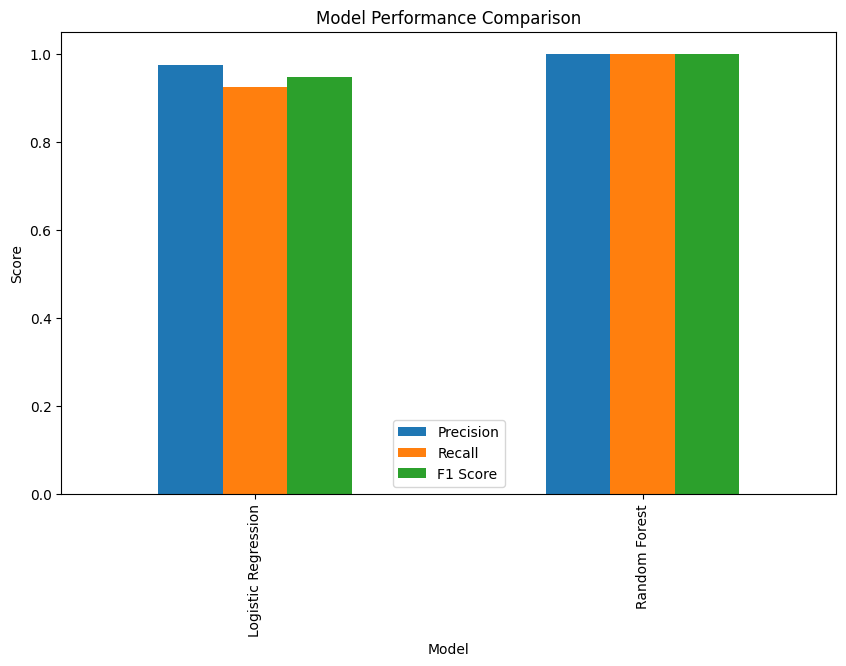

In [16]:
performance_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()